In [8]:
import numpy as np
import sympy as sm
import math as m
import scipy as sc
import matplotlib.pyplot as plt

# Берестов Иван Михайлович
ЛР №2, Вариант 2.

# 1) Создать квадратную матрицу из случайных вещественных чисел размера 7. Найти скалярное произведение 4 строки на 5 столбец. Использовать срезы матриц

In [ ]:
matrix = np.random.rand(7,7)
row_4 = matrix[3, :]

col_5 = matrix[:, 4]

# Вычисляем скалярное произведение 4-й строки и 5-го столбца
print(np.dot(row_4, col_5))

0.9079905008768474


# 2) Создать вектор-строку 1x10 из случайных целых чисел. Вычислить норму $\|x\|_2$ самостоятельно написанной функцией и проверить результат с помощью linalg.norm() в Python.

In [40]:
x=np.random.randint(0,10,10)
def norm(x,i):
    return pow(sum(abs(x)**i),1/i)
print('Вектор:\n',x,'\nРучная:\n',norm(x,2),"\nБиблиотечная:\n",np.linalg.norm(x))

Вектор:
 [6 7 0 7 8 2 4 7 8 9] 
Ручная:
 20.29778313018444 
Библиотечная:
 20.29778313018444


# 3) Создать матрицу из случайных целых чисел. Найти норму матрицы $\|A\|_{\infty}$ с помощью самостоятельно написанного алгоритма, проверить результат с помощью linalg.norm() в Python.

In [43]:
A = np.random.randint(0, 10, (6, 6))
def inf_norm(A):
    if isinstance(A, list):
        A = np.array(A)
    return np.max(np.sum(np.abs(A), axis=1))

print('Матрица:\n',A,'\nРучная:\n',inf_norm(A),"\nБиблиотечная:\n",np.linalg.norm(A, ord=np.inf))

Матрица:
 [[9 4 1 1 8 6]
 [5 5 2 2 2 9]
 [3 3 4 3 6 3]
 [1 5 7 2 9 8]
 [5 2 9 9 8 1]
 [5 9 7 5 5 9]] 
Ручная:
 40 
Библиотечная:
 40.0


# 4) Найти псевдорешение системы 
$\begin{cases}
3.1x_1 + 2.8x_2 + 1.9x_3 &= 0.2 \\
1.9x_1 + 3.1x_2 + 2.1x_3 &= 2.1 \\
7.5x_1 + 3.8x_2 + 4.8x_3 &= 5.6 \\
3.01x_1 - 0.33x_2 + 0.11x_3 &= 0.13
\end{cases}$

In [44]:

A = np.array([
    [3.1, 2.8, 1.9], 
    [1.9, 3.1, 2.1],    
    [7.5, 3.8, 4.8],    
    [3.01, -0.33, 0.11]  
])

B = np.array([0.2, 2.1, 5.6, 0.13])

print('Матрица:\n',A,'\nСтолбец:\n', B,'\nРучная:\n',np.linalg.inv(A.T @ A) @ A.T @ B,"\nБиблиотечная:\n",np.linalg.pinv(A) @ B)

Матрица:
 [[ 3.1   2.8   1.9 ]
 [ 1.9   3.1   2.1 ]
 [ 7.5   3.8   4.8 ]
 [ 3.01 -0.33  0.11]] 
Столбец:
 [0.2  2.1  5.6  0.13] 
Ручная:
 [-0.28402623 -1.02866072  2.43639639] 
Библиотечная:
 [-0.28402623 -1.02866072  2.43639639]


# 5) Даны пять точек (3; 7), (5; 2), (7; 10), (9, 1), (10, 8). Найти уравнение наиболее выгодной траектории. Построить график.


Уравнение траектории: y = -0.01x + 5.68


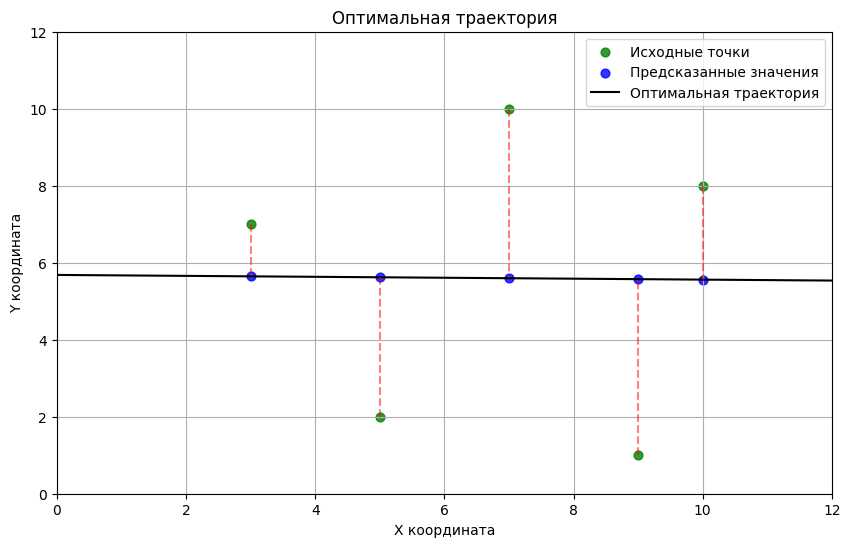

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Исходные данные точек
points = np.array([[3, 7], [5, 2], [7, 10], [9, 1], [10, 8]])
x_points = points[:, 0]
y_points = points[:, 1]

# Вычисляем коэффициенты регрессии (y = ax + b)
A = np.vstack([x_points, np.ones(len(x_points))]).T
coefficients = np.linalg.inv(A.T @ A) @ A.T @ y_points
a, b = coefficients
print("\nУравнение траектории: y = {:.2f}x + {:.2f}".format(a, b))

# Вычисляем предсказанные значения
y_pred = a * x_points + b

# Настройка графика
plt.figure(figsize=(10, 6))
plt.xlim(0, 12)  
plt.ylim(0, 12)  

# Отображаем исходные точки и предсказанные значения
plt.scatter(x_points, y_points, s=40, c='g', marker='o', alpha=0.8, label='Исходные точки')
plt.scatter(x_points, y_pred, s=40, c='b', marker='o', alpha=0.8, label='Предсказанные значения')

# Линия регрессии
X_support = np.linspace(0, 12, 100)
Y_model = a * X_support + b
plt.plot(X_support, Y_model, 'k-', label='Оптимальная траектория')

# Вертикальные линии (ошибки)
for i in range(len(x_points)):
    plt.plot([x_points[i], x_points[i]], [y_points[i], y_pred[i]], 'r--', alpha=0.5)

plt.xlabel('X координата')
plt.ylabel('Y координата')
plt.title('Оптимальная траектория')
plt.legend()
plt.grid(True)
plt.show()

# 6) Создать произвольную нижнетреугольную матрицу А 5 порядка (не унитреугольную), вектор B произвольный. Решить систему AX = B.

In [52]:
import numpy as np

# Создаем нижнетреугольную матрицу 5x5 с ненулевыми элементами на диагонали
while True:
    A = np.tril(np.random.randint(0, 10, (5, 5)))
    if np.all(np.diag(A) != 0):  # Проверяем, что диагональные элементы не нули
        break

B = np.random.randint(0, 10, 5)
print("\nНижнетреугольная матрица:\n", A)
print("Вектор B:\n", B)

# Решение прямой подстановкой
n = len(B)
x = np.zeros(n)
for i in range(n):  # Изменено направление обхода
    if A[i, i] == 0:
        if B[i] == 0:
            x[i] = np.nan  # Система имеет бесконечно много решений
        else:
            x[i] = np.inf  # Система несовместна
    else:
        x[i] = (B[i] - np.sum(A[i, :i] * x[:i])) / A[i, i]  # формула для нижнетреугольного случая
print("\nРучная:", x)

# Проверка с помощью библиотечной функции
try:
    x_lib = np.linalg.solve(A, B)
    print("Библиотечная:", x_lib)
except np.linalg.LinAlgError:
    print("Система не имеет единственного решения (матрица вырождена)")


Нижнетреугольная матрица:
 [[3 0 0 0 0]
 [5 1 0 0 0]
 [7 1 9 0 0]
 [1 7 0 6 0]
 [6 3 8 3 2]]
Вектор B:
 [8 5 5 3 7]

Ручная: [ 2.66666667 -8.33333333 -0.59259259  9.77777778 -4.2962963 ]
Библиотечная: [ 2.66666667 -8.33333333 -0.59259259  9.77777778 -4.2962963 ]


# 7) Решить систему, используя LU разложение матрицы. LU разложение должно быть найдено самостоятельно написанной функцией, полученные матрицы выведены на экран. Придерживаться плана решения, приведенного в пособии! Решение системы должно быть проверено встроенной функцией Python